<a href="https://colab.research.google.com/github/landryp/ns-struc-modes/blob/master/nsstruc_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# NSSTRUC_DEMO.IPYNB -- minimal working example of running the ns-struc TOV solver from within a python notebook

In [6]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone -b enthalpy https://github.com/landryp/ns-struc-modes.git # download code repository from https://github.com/landryp/ns-struc/tree/enthalpy

mkdir /opt/bin /opt/lib/ /opt/lib/python2.7 /opt/lib/python2.7/site-packages # create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-modes # install code
python2 setup.py install --prefix /opt/

echo -e '\n *** \n'

getnsprops -h # this is the executable from ns-struc that solves the TOV equations to compute neutron star observables; print its help string to see the syntax for calling it

echo -e '\n *** \n'

running install
running bdist_egg
running egg_info
writing ns_struc_modes.egg-info/PKG-INFO
writing top-level names to ns_struc_modes.egg-info/top_level.txt
writing dependency_links to ns_struc_modes.egg-info/dependency_links.txt
writing manifest file 'ns_struc_modes.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/constants.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/tov.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/struceqs.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/pltsetup.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/macro.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/branch.py -> build/bdi

fatal: destination path 'ns-struc-modes' already exists and is not an empty directory.
mkdir: cannot create directory ‘/opt/bin’: File exists
mkdir: cannot create directory ‘/opt/lib/’: File exists
mkdir: cannot create directory ‘/opt/lib/python2.7’: File exists
mkdir: cannot create directory ‘/opt/lib/python2.7/site-packages’: File exists
zip_safe flag not set; analyzing archive contents...


In [ ]:
#Only have to run this cell 

%%bash

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd ns-struc-modes/

git pull 

python2 setup.py install --prefix /opt/

In [7]:
# calculate neutron star observables for a given equation of state

%%bash
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops mpa1.csv -p M,R,Lambda -m 1.,3. -d /content/ns-struc-modes/ -o /content/ -v # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] -d [directory where the eos table lives] -o [directory where the table of observables should be output]

getnsprops hqc18.csv -p M,R,Lambda -m 1.,3. -d /content/ns-struc-modes/  -o /content/ -v

getnsprops sly.csv -p M,R,Lambda -m 1.,3. -d /content/ns-struc-modes/ -o /content/ -v

getnsprops sly230a.csv -p M,R,Lambda -m 1.,3. -d /content/ns-struc-modes/ -o /content/ -v



Calculate properties of mpa1 stars
Start at mass 1.0 Msun
Done at mass 3.0 Msun
Calculate properties of hqc18 stars
Start at mass 1.0 Msun
Done at mass 3.0 Msun
Calculate properties of sly stars
Start at mass 1.0 Msun
Done at mass 3.0 Msun
Calculate properties of sly230a stars
Start at mass 1.0 Msun
Done at mass 3.0 Msun


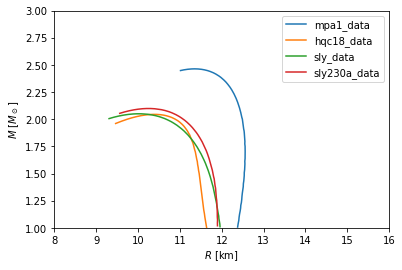

In [8]:
# load the table of observables and plot the mass-radius relation predicted by the given equation of state

# this is a normal python notebook cell

import numpy as np # import packages
import matplotlib.pyplot as plt

mrl_data = np.genfromtxt('/content/macro-mpa1.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['R'],mrl_data['M']) # plot the mass-radius relation

mrl_data = np.genfromtxt('/content/macro-hqc18.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['R'],mrl_data['M']) # plot the mass-radius relation

mrl_data = np.genfromtxt('/content/macro-sly.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['R'],mrl_data['M']) # plot the mass-radius relation

mrl_data = np.genfromtxt('/content/macro-sly230a.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['R'],mrl_data['M']) # plot the mass-radius relation

plt.xlabel(r'$R$ [km]') # add plot labels, etc.
plt.ylabel(r'$M$ [$M_\odot$]')
plt.xlim(8.,16.)
plt.ylim(1.,3.)
plt.legend(['mpa1_data','hqc18_data','sly_data','sly230a_data'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  app.launch_new_instance()


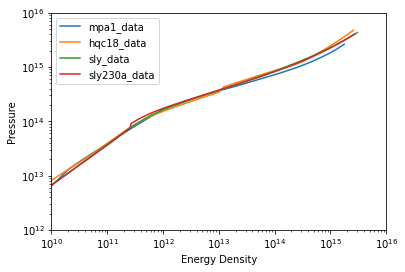

In [9]:
mpa1_data = np.genfromtxt('/content/ns-struc-modes/mpa1.csv', delimiter=',', names=True, dtype=None)

plt.plot(mpa1_data['pressurec2'], mpa1_data['energy_densityc2'])


hqc18_data = np.genfromtxt('/content/ns-struc-modes/hqc18.csv', delimiter=',', names=True, dtype=None)

plt.plot(hqc18_data['pressurec2'], hqc18_data['energy_densityc2'])


sly_data = np.genfromtxt('/content/ns-struc-modes/sly.csv', delimiter=',', names=True, dtype=None)

plt.plot(sly_data['pressurec2'], sly_data['energy_densityc2'])


sly230a_data = np.genfromtxt('/content/ns-struc-modes/sly230a.csv', delimiter=',', names=True, dtype=None)

plt.plot(sly230a_data['pressurec2'], sly230a_data['energy_densityc2'])

plt.xlabel('Energy Density') # add plot labels and limits
plt.ylabel('Pressure')
plt.xscale('log')
plt.xlim(10**10,10**16) 
plt.yscale('log')
plt.ylim(10**12,10**16)
plt.legend(['mpa1_data','hqc18_data','sly_data','sly230a_data'])
plt.show()

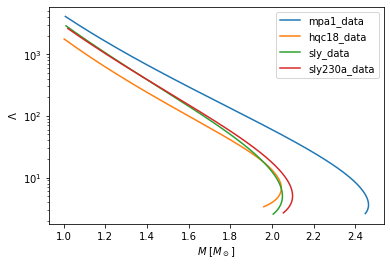

In [10]:
mrl_data = np.genfromtxt('/content/macro-mpa1.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['Lambda']) # plot the mass-tidal deformability relation

mrl_data = np.genfromtxt('/content/macro-hqc18.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['Lambda']) # plot the mass-tidal deformability relation

mrl_data = np.genfromtxt('/content/macro-sly.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['Lambda']) # plot the mass-tidal deformability relation

mrl_data = np.genfromtxt('/content/macro-sly230a.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['Lambda']) # plot the mass-tidal deformability relation

plt.ylabel(r'$\Lambda$') # add plot labels, etc.
plt.xlabel(r'$M$ [$M_\odot$]')
plt.yscale('log')
#plt.xlim(8.,16.)
#plt.ylim(1.,3.)
plt.legend(['mpa1_data','hqc18_data','sly_data','sly230a_data'])
plt.show()

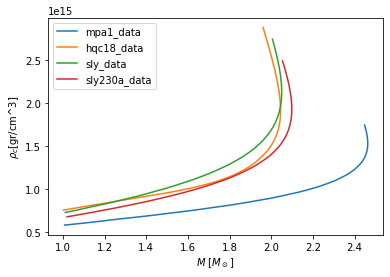

In [11]:
mrl_data = np.genfromtxt('/content/macro-mpa1.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['rhoc']) # plot the mass-tidal deformability relation

mrl_data = np.genfromtxt('/content/macro-hqc18.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['rhoc']) # plot the mass-tidal deformability relation

mrl_data = np.genfromtxt('/content/macro-sly.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['rhoc']) # plot the mass-tidal deformability relation

mrl_data = np.genfromtxt('/content/macro-sly230a.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['M'], mrl_data['rhoc']) # plot the mass-tidal deformability relation

plt.ylabel(r'$\rho_c$[gr/cm^3]') # add plot labels, etc.
plt.xlabel(r'$M$ [$M_\odot$]')
#plt.yscale('log')
#plt.xlim(8.,16.)
#plt.ylim(1.,3.)
plt.legend(['mpa1_data','hqc18_data','sly_data','sly230a_data'])
plt.show()